## Kyphosis Detection in children - Overview


* Kyphosis is an abnormally excessive convex curvature of the spine. 
* The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output.

_**INPUTS**_ 
> **Age**: in months<br>
> **Number**: the number of vertebrae involved in the operation<br>
> **Start**: the number of the first (topmost) vertebra operated on.<br>

_**OUTPUTS**_
> **Kyphosis**: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.<br>

### Objective : 
 Detect the presence of kyphosis post operation on a child based on the given attributes.

<br><br>


More about Kyphosis :
https://orthoinfo.aaos.org/en/diseases--conditions/kyphosis-roundback-of-the-spine/


### Import libraries

In [75]:
import pandas as pd
import numpy as np

import seaborn as sns
# sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline


### Load data

In [46]:
df_orig = pd.read_csv('kyphosis.csv')
df_orig.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


### Perform some EDA

In [47]:
df_orig.shape

(81, 4)

In [48]:
df_orig.nunique()

Kyphosis     2
Age         64
Number       8
Start       16
dtype: int64

# Missing rows:

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64


<AxesSubplot:>

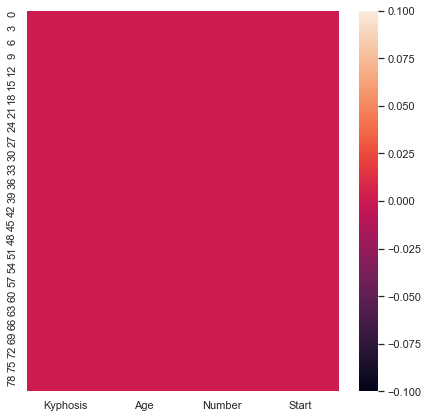

In [49]:
print("# Missing rows:\n")
print(df_orig.isnull().sum())
plt.figure(figsize=(7,7))
sns.heatmap(df_orig.isnull())

> There is no missing data

##### Feature Analysis

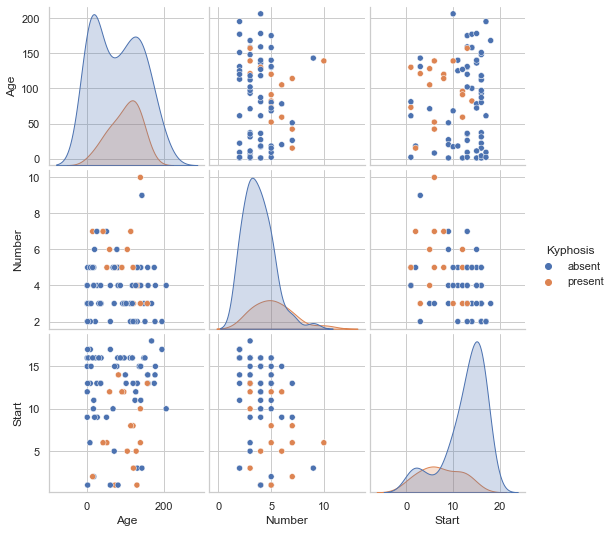

In [50]:
sns.pairplot(data=df_orig,vars=['Age','Number','Start'],hue='Kyphosis')

<AxesSubplot:xlabel='Start', ylabel='count'>

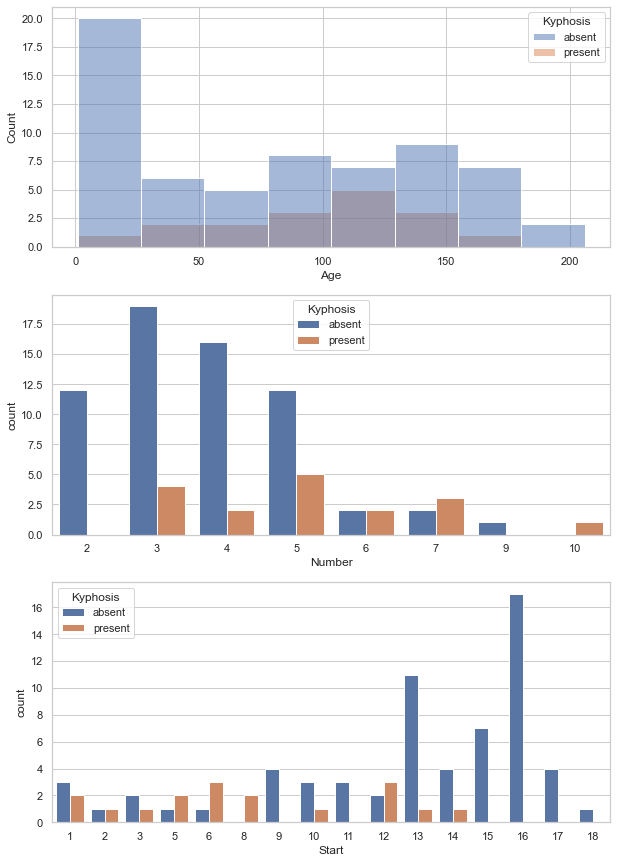

In [59]:
plt.figure(figsize=(10,15))
plt.subplot(311)
sns.histplot(data=df_orig,x='Age',hue='Kyphosis')
plt.subplot(312)
sns.countplot(data=df_orig,x='Number',hue='Kyphosis')
plt.subplot(313)
sns.countplot(data=df_orig,x='Start',hue='Kyphosis')


- Most children of all age groups dont have kyphosis. 
- Presence of the disease is mostly seen in children of 10-15 years of age, yet the numbers are less. 
- No occurence of the disease seen when the operation is done on a large number of vertebra.

### Prepare Data


In [62]:
df_orig.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [65]:
df=df_orig.copy()

map_class = {'present':1,'absent':0}
df['Kyphosis'] = df['Kyphosis'].map(map_class)
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [73]:
X = df.drop(columns='Kyphosis').values
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X)

y = df['Kyphosis'].values.reshape(-1,1)


X_scaled.shape,y.shape

((81, 3), (81, 1))

### Train the model


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((64, 3), (17, 3), (64, 1), (17, 1))

In [79]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

/Users/eashwar/opt/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

### Model Performance

In [80]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)


In [96]:
print("Train set accuracy : ",accuracy_score(y_train,y_pred_train))
print("Test set accuracy : ",accuracy_score(y_test,y_pred_test))


Train set accuracy :  1.0
Test set accuracy :  0.7058823529411765


<AxesSubplot:title={'center':'Test Set'}>

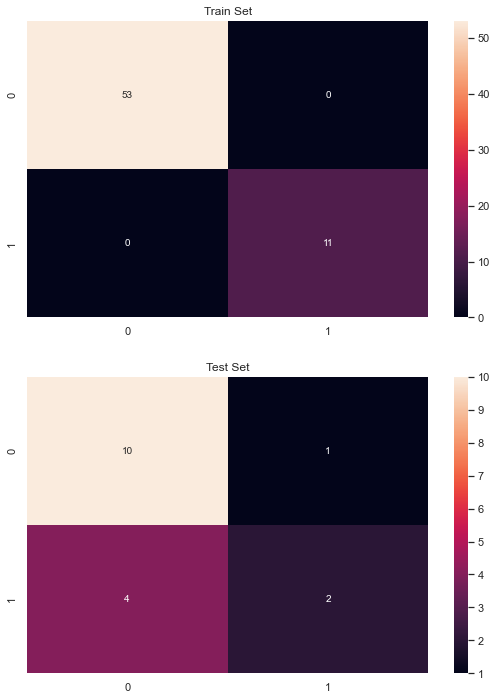

In [93]:
plt.figure(figsize=(9,12))
plt.subplot(211)
plt.title("Train Set")
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True)
plt.subplot(212)
plt.title("Test Set")
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)

In [94]:
print("Train Set")
print(classification_report(y_train,y_pred_train))

Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        11

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [95]:
print("Test Set")
print(classification_report(y_test,y_pred_test))

Test Set
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.67      0.33      0.44         6

    accuracy                           0.71        17
   macro avg       0.69      0.62      0.62        17
weighted avg       0.70      0.71      0.67        17



In [ ]:
s